<h1><center>Individual Report</center></h1>
By:Simon Kravtsov <br> Student ID:M00556977

# Task 1 - Importing and describing dataset

Loading syntetic dataset as pandas dataframe

In [18]:
import pandas as pd
synthetic_data = pd.read_csv('data/synthetic.csv')

Summary of data

In [2]:
synthetic_data.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x22,x23,x24,x25,x26,x27,x28,x29,x30,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-13.028746,2.182041,-0.331036,-1.501078,-12.622918,-10.854249,15.199978,-1.989472,6.407913,-2.926042,...,-5.472288,10.543841,-6.003123,3.746927,18.425973,2.742845,3.475475,1.864313,-1.137531,0.145000
std,3.659720,1.314388,4.259927,1.922640,3.604514,9.750920,7.206344,6.454849,16.872978,0.673362,...,0.272104,8.311382,1.873970,4.962534,6.134947,7.049830,2.048401,10.351793,8.543692,0.352277
min,-25.548066,-1.599455,-14.930338,-10.215498,-24.600418,-55.753091,-4.320908,-22.643235,-51.040173,-4.907236,...,-6.378320,-14.553686,-12.804169,-10.970233,-1.014732,-18.778590,-2.594584,-30.715194,-27.231646,0.000000
25%,-15.588659,1.285855,-3.149624,-2.808884,-15.109200,-17.120274,10.231755,-6.188742,-4.853568,-3.383162,...,-5.666194,4.728117,-7.268277,0.279869,14.232877,-2.051034,2.102943,-4.779697,-6.883752,0.000000
50%,-13.072938,2.170483,-0.367062,-1.510223,-12.498793,-11.170167,15.196222,-2.026093,6.431541,-2.928571,...,-5.467538,10.698797,-5.919298,3.841361,18.301716,2.989103,3.488600,1.362105,-1.012529,0.000000
75%,-10.534016,3.021294,2.485166,-0.237209,-10.214818,-4.522221,19.901376,2.392737,18.145285,-2.487445,...,-5.287631,16.268073,-4.677299,7.306957,22.495502,7.393532,4.913292,8.998301,4.753629,0.000000
max,-2.382520,6.026316,14.980421,5.101086,2.182904,23.826332,36.646915,19.820630,55.897492,-0.712244,...,-4.671847,36.154495,-0.188857,20.068337,36.539176,25.577773,9.590002,31.900767,31.280122,1.000000


The features have normal distrbution, so we dont need any normalization for the data, however
features are not standardized<br>
The standardization will be performed later when the data will be split into k-fold, as we want test data to be untouched.

In [5]:
synthetic_data.shape

(1000, 31)

synthetic data contains 1000 observations, 30 features and 1 dependent variable (y) <br>
The features and target are numeric.

No null values are present in a dataset 

In [402]:
synthetic_data.isnull().values.any()

False

Counting the occurence of each class in dependend variable to see how balanced is the data

0    855
1    145
Name: y, dtype: int64


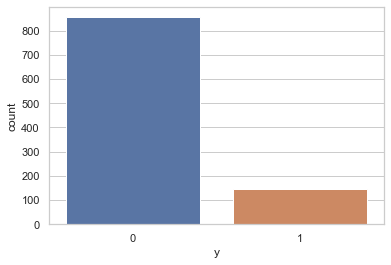

In [564]:
print(synthetic_data.y.value_counts())
import seaborn as sns
classBalance = sns.countplot(x="y", data=synthetic_data)

We can see that the data is very imbalanced, over 85% of data is labeled as class 0. Initial model can be very bais, in fact, if we make a dummy function to only predict 0, it will predict correctly for over 85% of times <br> In further tasks several measures will be taken to try and deal with this problem. 

# Task 2 - Splitting data into k-fold validation + Validation set 

The k-fold cross validation + validation step will be used to estimate an unbiased accuracy of a model.<br>
For that we will split out data to leave 20% for validation to test it on the final model.<br>

In [358]:
import numpy as np
data, validation = np.split(synthetic_data.sample(frac=1,random_state=10).reset_index(drop=True), 
                            [int(.8 * len(synthetic_data))])

The frac keyword argument specifies the fraction of rows to return in the random sample,frac=1 means return all rows (in random order)

In [4]:
validation.shape

(200, 31)

200 observation will be used to test the final model

In [360]:
data.shape

(800, 31)

800 will be used in k-fold validation to tune model

10-fold will be used 

In [361]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle=True, random_state=0)
kf.get_n_splits(data)

10

# Task 3 - Balancing dataset ,Training and tunning classification model 

## Model
A **RandomForest** classification algorithm will be used. The following parameters were chosen to be contant:<br>
**n_estimators =** 100 (number of trees in the forest)<br>
**random_state =** 10 (Controls randomness)<br>
**criterion =** 'gini' (function to measure the quality of a split)<br>
<br>
First algorithm was training to see its initial accuracy. To actimate accuracy of a model, f-score will be used.<br>
Now the features can be standardized for trainig set in k fold validaion.

In [375]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score, f1_score, precision_score
from numpy.core.umath_tests import inner1d
sc = StandardScaler()

f_score_train = np.array([])
f_score_test = np.array([])
confusionMatrix =np.array([[0, 0],[0, 0]])


for train_index, test_index in kf.split(data):
    x_train, x_test = data.loc[train_index].drop(['y'], axis=1), data.loc[test_index].drop(['y'], axis=1)
    y_train, y_test = data.loc[train_index][["y"]], data.loc[test_index][["y"]]
    
    #feature scaling 
    sc.fit(x_train)
    x_train = sc.transform(x_train)
    x_test = sc.transform (x_test)
    
    #defining model
    rfc = RandomForestClassifier(n_estimators=100,criterion='gini', random_state=10)
    #model training
    rfc.fit(x_train, np.ravel(y_train))
    #test and train predict
    y_test_pred = rfc.predict(x_test)
    y_train_pred = rfc.predict(x_train)
    
    #confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    TP = cm[0][0]
    FN = cm[0][1]
    FP = cm[1][0]
    TN = cm[1][1]
    
    #f-score accuracy according to condusion matrixs
    fscore_test = f1_score(y_test, y_test_pred, average='macro')
    fscore_train = f1_score(y_train, y_train_pred, average='macro')
    confusionMatrix = np.add(confusionMatrix,cm)
    
    fscore_train = np.append(fscore_train,fscore_train)
    f_score_test = np.append(f_score_test,fscore_test)

In [376]:
balanced_accuracy = (TP/(TP+FP)+TN/(TN+FN))/2
print ("f-socre Test: ",f_score_test.mean())
print ("f-socre Train: ",fscore_train.mean())
print ("Confusion Matrix \n",confusionMatrix)
print ("Balanced Accuracy Test: ",balanced_accuracy)

f-socre Test:  0.4601057189646108
f-socre Train:  1.0
Confusion Matrix 
 [[682   1]
 [117   0]]
Balanced Accuracy Test:  nan


A large gap between train and test data can be seen from the results. The model has a high variance (overfitting).<br>
From confusion matrix can be seen that the model is not performing well, it predicts well only one of the classes, and didnt predict correctly the other class even once. 
<br>
The balanced accuracy was used according to confusion matrix, as dataset is unbalanced, it should a better overall performance of a model. (it is not defined as one of the classes was not once predicted correctly)

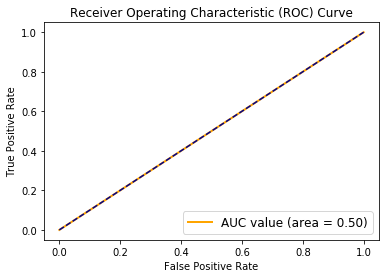

In [378]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Calculate roc auc
roc_value = roc_auc_score(y_test, y_test_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC value (area = %0.2f)' % roc_value, lw=2)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(fontsize=12, loc=4)
    plt.show()

plot_roc_curve(fpr, tpr) 

Roc curve tells us how well classification model is capable of distinguishing between classes. The model is not preforming well as it doesnt even surpass the basline of ROC curve

## Balancing dataset 

Dataset will be balanced to try and solve imbalanced class probelem, so one class won't dominate over the other. <br>
3 methods where found to balance dataset (Oversampling minority, Downsampling majority and generating synthetic samples). After trying all 3 of them, the Oversampling minority method displayed the best results for the currect dateset.   

### Oversampling minority
The test set is untouched with oversampling and standardization.
Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets, which can allow our model to memorize specific data points and cause overfitting and poor generalization to the test data

In [384]:
from sklearn.utils import resample
sc = StandardScaler()

fscores_train = np.array([])
fscores_test = np.array([])

confusionMatrix_upsample =np.array([[0,0],[0,0]])


for train_index, test_index in kf.split(data):
    x_train, x_test = data.loc[train_index].drop(['y'], axis=1), data.loc[test_index].drop(['y'], axis=1)
    y_train, y_test = data.loc[train_index][["y"]], data.loc[test_index][["y"]]
    
    #Balancing dataset 
    X = pd.concat([x_train, y_train], axis=1)
    
    zero_class = X[X.y==0]
    one_class = X[X.y==1]
    
    oneclass_upsampled = resample(one_class,
                          replace=True, # sample with replacement
                          n_samples=len(zero_class), # match number in majority class
                          random_state=27)
    
    upsampled = pd.concat([zero_class, oneclass_upsampled])
    
    
    y_train = upsampled[['y']]
    x_train = upsampled.loc[:, upsampled.columns != 'y']
    
    #feature scaling 
    sc.fit(x_train)
    x_train = sc.transform(x_train)
    x_test = sc.transform (x_test)


    rfc = RandomForestClassifier(random_state=10, n_estimators=100,criterion='gini')
    rfc.fit(x_train, y_train.values.ravel())
        
    y_test_pred_RDF = rfc.predict(x_test)
    y_train_pred_RDF = rfc.predict(x_train)
        
        
    #F_score
    f_score_test = f1_score(y_test, y_test_pred_RDF, average='macro')
    f_score_train = f1_score(y_train, y_train_pred_RDF, average='macro')
        
    fscores_test_upsample = np.append(fscores_test,f_score_test)
    fscores_train_upsample = np.append(fscores_train,f_score_train)
        
    #confusion matrix
    cm = confusion_matrix(y_test, y_test_pred_RDF)
    confusionMatrix_upsample = np.add(confusionMatrix_upsample,cm)

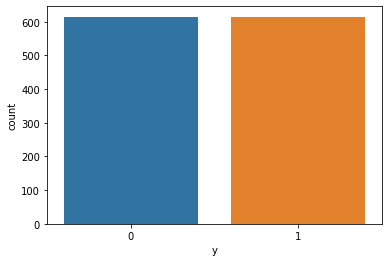

In [381]:
classBalance = sns.countplot(x="y", data=upsampled)

Now there is equal number of sample in each class. Dataset is balanced

In [387]:
print ("F_Score")
print ("RDF-UPsampling Test: ", fscores_test_upsample.mean())
print ("RDF-UPsampling Train: ", fscores_train_upsample.mean())
print ("Confusion Matrix \n",confusionMatrix_upsample)

F_Score
RDF-UPsampling Test:  0.45945945945945943
RDF-UPsampling Train:  1.0
Confusion Matrix 
 [[681   2]
 [110   7]]


We still observer high overfitting, as large difference between train and test. The f-score has decreased however, in confusion matrix we can see that algorithm now starts to predict both classes, one classes still better. Tunning now will be performed to try and achieve better f-score.

## Random forest Parameters tunning

## Stoping criteria 
### Max Features tunning 
First the main parameter max_features of the tree was tunned to find the best bias variance trade off

In [144]:
sc = StandardScaler()

avg_fscores_train = np.array([])
avg_fscores_test = np.array([])

confusionMatrix =np.array([[0, 0],[0, 0]])

# full range from 1 to 30 
# maxFeatures = list(range(1,data.shape[1]))

#ranges 
maxFeatures = list(range(5,15))
for n_features in maxFeatures:
    fscores_train = np.array([])
    fscores_test = np.array([])
    
    auc_scores_train = np.array([])
    auc_scores_test = np.array([])


    for train_index, test_index in kf.split(data):
        x_train, x_test = data.loc[train_index].drop(['y'], axis=1), data.loc[test_index].drop(['y'], axis=1)
        y_train, y_test = data.loc[train_index][["y"]], data.loc[test_index][["y"]]
        
        #tranformation 
        X = pd.concat([x_train, y_train], axis=1)
    
        zero_class = X[X.y==0]
        one_class = X[X.y==1]
    
        oneclass_upsampled = resample(one_class,
                                    replace=True, # sample with replacement
                                    n_samples=len(zero_class), # match number in majority class
                                    random_state=27)
    
        upsampled = pd.concat([zero_class, oneclass_upsampled])
    
    
        y_train = np.array(downsampled[['y']])
        x_train = np.array(downsampled.loc[:, upsampled.columns != 'y'])


        #feature scaling 
        sc.fit(x_train)
        x_train = sc.transform(x_train)
        x_test = sc.transform (x_test)

        #selecting parameters
        rfc = RandomForestClassifier(n_estimators=100, criterion='gini', 
                                     max_features=n_features, random_state=10)
        #training 
        rfc.fit(x_train, y_train)
        
        #pred
        y_test_pred_RDF = rfc.predict(x_test)
        y_train_pred_RDF = rfc.predict(x_train)
        
        
        #F_score
        f_score_test = f1_score(y_test, y_test_pred_RDF, average='macro')
        f_score_train = f1_score(y_train, y_train_pred_RDF, average='macro')
        
        fscores_test = np.append(fscores_test,f_score_test)
        fscores_train = np.append(fscores_train,f_score_train)
        
        #confusion matrix
        cm = confusion_matrix(y_test, y_test_pred_RDF)
        confusionMatrix = np.add(confusionMatrix,cm)
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
    
    avg_fscores_test = np.append(avg_fscores_test,fscores_test.mean())
    avg_fscores_train = np.append(avg_fscores_train,fscores_train.mean()) 
    
    avg_auc_test = np.append(avg_auc_test,auc_scores_test.mean()) 
    avg_auc_train = np.append(avg_auc_train,auc_scores_train.mean()) 

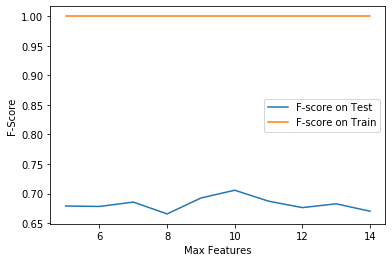

In [145]:
import matplotlib.pyplot as plt
plt.plot(maxFeatures, avg_fscores_test, label= 'F-score on Test')
plt.plot(maxFeatures, avg_fscores_train,label= 'F-score on Train')
plt.xlabel("Max Features")
plt.ylabel("F-Score")
plt.legend(loc=0)
plt.show()

In [146]:
print ("Train: ",avg_fscores_test.max())

Train:  0.7057282287414035


Best bias variance trade off

In [147]:
tunnedMaxFeatures = maxFeatures[np.argmax(avg_fscores_test)]
tunnedMaxFeatures

10

We can observe that the model significantly improved from original 0.46 f-score to 0.7, however there is still very high overfitting for all values of max_features. In this case more parameters will be tunned to try and minimine that overfitting. 
After some research, the other most common tunning parameter that have impact on overfitting were tried, max depth ,min sample split, min sample leave. (Other like min impurity decrease and min weight fraction leaf parameters that have impact on prunning methods, however the best performing were the default values)

### Max Depth
maximum depth of the tree

In [277]:
sc = StandardScaler()

avg_fscores_train = np.array([])
avg_fscores_test = np.array([])

confusionMatrix =np.array([[0, 0],[0, 0]])

#ranges to test 
maxDepth = range(1,20)
for n_depth in maxDepth:
    fscores_train = np.array([])
    fscores_test = np.array([])
    
    auc_scores_train = np.array([])
    auc_scores_test = np.array([])


    for train_index, test_index in kf.split(data):
        x_train, x_test = data.loc[train_index].drop(['y'], axis=1), data.loc[test_index].drop(['y'], axis=1)
        y_train, y_test = data.loc[train_index][["y"]], data.loc[test_index][["y"]]
        
        #balancing data
        X = pd.concat([x_train, y_train], axis=1)
    
        zero_class = X[X.y==0]
        one_class = X[X.y==1]
    
        oneclass_upsampled = resample(one_class,
                                    replace=True, # sample with replacement
                                    n_samples=len(zero_class), # match number in majority class
                                    random_state=27)
    
        upsampled = pd.concat([zero_class, oneclass_upsampled])
    
    
        y_train = np.array(downsampled[['y']])
        x_train = np.array(downsampled.loc[:, upsampled.columns != 'y'])


        #feature scaling 
        sc.fit(x_train)
        x_train = sc.transform(x_train)
        x_test = sc.transform (x_test)

        #parameters need, the max features was added from last tunning.
        rfc = RandomForestClassifier(n_estimators=100, criterion='gini',
                                     max_features=10,
                                     max_depth=n_depth, random_state=10)
        #train
        rfc.fit(x_train, y_train)
        
        #pred
        y_test_pred_RDF = rfc.predict(x_test)
        y_train_pred_RDF = rfc.predict(x_train)
        
        
        #F_score
        f_score_test = f1_score(y_test, y_test_pred_RDF, average='macro')
        f_score_train = f1_score(y_train, y_train_pred_RDF, average='macro')
        
        fscores_test = np.append(fscores_test,f_score_test)
        fscores_train = np.append(fscores_train,f_score_train)
        
        #confusion matrix
        cm = confusion_matrix(y_test, y_test_pred_RDF)
        confusionMatrix = np.add(confusionMatrix,cm)
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
    
    avg_fscores_test = np.append(avg_fscores_test,fscores_test.mean())
    avg_fscores_train = np.append(avg_fscores_train,fscores_train.mean()) 
    
    avg_auc_test = np.append(avg_auc_test,auc_scores_test.mean()) 
    avg_auc_train = np.append(avg_auc_train,auc_scores_train.mean()) 
    

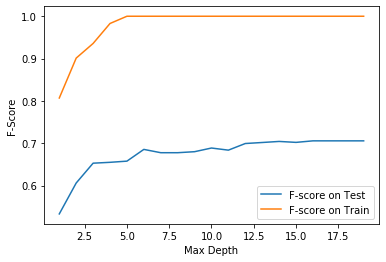

In [278]:
import matplotlib.pyplot as plt
plt.plot(maxDepth, avg_fscores_test, label= 'F-score on Test')
plt.plot(maxDepth, avg_fscores_train,label= 'F-score on Train')
plt.xlabel("Max Depth")
plt.ylabel("F-Score")
plt.legend(loc=0)
plt.show()

In [282]:
tunnedMaxDepth = maxDepth[np.argmax(avg_fscores_test)]
tunnedMaxDepth

16

Again parameter was chosen on the best bias variance trade off

### Min sample split 
minimum number of samples required to split an internal node

In [389]:
sc = StandardScaler()

avg_fscores_train = np.array([])
avg_fscores_test = np.array([])

confusionMatrix =np.array([[0, 0],[0, 0]])

minSampleSplit = range(1,15)
minSampleSplit = np.array(minSampleSplit)/1000
for n_minsplit in minSampleSplit:
    fscores_train = np.array([])
    fscores_test = np.array([])
    
    auc_scores_train = np.array([])
    auc_scores_test = np.array([])


    for train_index, test_index in kf.split(data):
        x_train, x_test = data.loc[train_index].drop(['y'], axis=1), data.loc[test_index].drop(['y'], axis=1)
        y_train, y_test = data.loc[train_index][["y"]], data.loc[test_index][["y"]]
        
        #tranformation 
        X = pd.concat([x_train, y_train], axis=1)
    
        zero_class = data[data.y==0]
        one_class = data[data.y==1]
        
        oneclass_upsampled = resample(one_class,
                                    replace=True, # sample with replacement
                                    n_samples=len(zero_class), # match number in majority class
                                    random_state=27)
    
        upsampled = pd.concat([zero_class, oneclass_upsampled])
    
    
    
        y_train = np.array(downsampled[['y']])
        x_train = np.array(downsampled.loc[:, upsampled.columns != 'y'])


        #feature scaling 
        sc.fit(x_train)
        x_train = sc.transform(x_train)
        x_test = sc.transform (x_test)


        rfc = RandomForestClassifier(n_estimators=100, criterion='gini',
                                     max_features=10,
                                     max_depth= 16,
                                     min_samples_split=n_minsplit, random_state=10)
        rfc.fit(x_train, y_train)
        
        y_test_pred_RDF = rfc.predict(x_test)
        y_train_pred_RDF = rfc.predict(x_train)
        
        
        #F_score
        f_score_test = f1_score(y_test, y_test_pred_RDF, average='macro')
        f_score_train = f1_score(y_train, y_train_pred_RDF, average='macro')
        
        fscores_test = np.append(fscores_test,f_score_test)
        fscores_train = np.append(fscores_train,f_score_train)
        
        #confusion matrix
        cm = confusion_matrix(y_test, y_test_pred_RDF)
        confusionMatrix = np.add(confusionMatrix,cm)
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
    
    avg_fscores_test = np.append(avg_fscores_test,fscores_test.mean())
    avg_fscores_train = np.append(avg_fscores_train,fscores_train.mean()) 
    
    avg_auc_test = np.append(avg_auc_test,auc_scores_test.mean()) 
    avg_auc_train = np.append(avg_auc_train,auc_scores_train.mean()) 
    

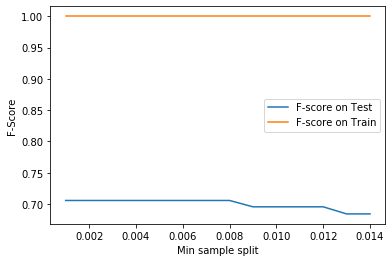

In [390]:
import matplotlib.pyplot as plt
plt.plot(minSampleSplit, avg_fscores_test, label= 'F-score on Test')
plt.plot(minSampleSplit, avg_fscores_train,label= 'F-score on Train')
plt.xlabel("Min sample split")
plt.ylabel("F-Score")
plt.legend(loc=0)
plt.show()

In [391]:
tunnedMinSampleSplit = minSampleSplit[np.argmax(avg_fscores_test)]
tunnedMinSampleSplit

0.001

## Min Sample leaf
minimum number of samples required to be at a leaf node

In [392]:
sc = StandardScaler()

avg_fscores_train = np.array([])
avg_fscores_test = np.array([])

confusionMatrix =np.array([[0, 0],[0, 0]])

minSampleLeaf = range(1,15)
minSampleLeaf = np.array(minSampleLeaf)/1000
for n_minleaf in minSampleLeaf:
    fscores_train = np.array([])
    fscores_test = np.array([])
    
    auc_scores_train = np.array([])
    auc_scores_test = np.array([])


    for train_index, test_index in kf.split(data):
        x_train, x_test = data.loc[train_index].drop(['y'], axis=1), data.loc[test_index].drop(['y'], axis=1)
        y_train, y_test = data.loc[train_index][["y"]], data.loc[test_index][["y"]]
        
        #tansformation
        X = pd.concat([x_train, y_train], axis=1)
    
        zero_class = X[X.y==0]
        one_class = X[X.y==1]
    
        oneclass_upsampled = resample(one_class,
                                    replace=True, # sample with replacement
                                    n_samples=len(zero_class), # match number in majority class
                                    random_state=27)
    
        upsampled = pd.concat([zero_class, oneclass_upsampled])
    
    
        y_train = np.array(downsampled[['y']])
        x_train = np.array(downsampled.loc[:, upsampled.columns != 'y'])


        #feature scaling 
        sc.fit(x_train)
        x_train = sc.transform(x_train)
        x_test = sc.transform (x_test)

    
        rfc = RandomForestClassifier(n_estimators=100, criterion='gini',
                                     max_features =10,
                                     min_samples_leaf=n_minleaf, random_state=10)
        rfc.fit(x_train, y_train)
        
        y_test_pred_RDF = rfc.predict(x_test)
        y_train_pred_RDF = rfc.predict(x_train)
        
        
        #F_score
        f_score_test = f1_score(y_test, y_test_pred_RDF, average='macro')
        f_score_train = f1_score(y_train, y_train_pred_RDF, average='macro')
        
        fscores_test = np.append(fscores_test,f_score_test)
        fscores_train = np.append(fscores_train,f_score_train)
        
        #confusion matrix
        cm = confusion_matrix(y_test, y_test_pred_RDF)
        confusionMatrix = np.add(confusionMatrix,cm)
        TP = cm[0][0]
        FP = cm[0][1]
        FN = cm[1][0]
        TN = cm[1][1]
    
    avg_fscores_test = np.append(avg_fscores_test,fscores_test.mean())
    avg_fscores_train = np.append(avg_fscores_train,fscores_train.mean()) 
    
    avg_auc_test = np.append(avg_auc_test,auc_scores_test.mean()) 
    avg_auc_train = np.append(avg_auc_train,auc_scores_train.mean()) 
    

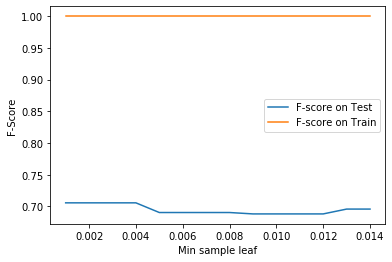

In [395]:
import matplotlib.pyplot as plt
plt.plot(minSampleLeaf, avg_fscores_test, label= 'F-score on Test')
plt.plot(minSampleLeaf, avg_fscores_train,label= 'F-score on Train')
plt.xlabel("Min sample leaf")
plt.ylabel("F-Score")
plt.legend(loc=0)
plt.show()

In [294]:
tunnedMinSampleLeaf = minSampleLeaf[np.argmax(avg_fscores_test)]
tunnedMinSampleLeaf

0.001

## Using all parameters
checking tunned parameters still on k-fold, to see if model need to further re-tunning.

In [396]:
sc = StandardScaler()


avg_fscores_train = np.array([])
avg_fscores_test = np.array([])

confusionMatrix =np.array([[0, 0],[0, 0]])

fscores_train = np.array([])
fscores_test = np.array([])
    
auc_scores_train = np.array([])
auc_scores_test = np.array([])

for train_index, test_index in kf.split(data):
    x_train, x_test = data.loc[train_index].drop(['y'], axis=1), data.loc[test_index].drop(['y'], axis=1)
    y_train, y_test = data.loc[train_index][["y"]], data.loc[test_index][["y"]]
    
    #transformation
    zero_class = data[data.y==0]
    one_class = data[data.y==1]

    oneclass_upsampled = resample(one_class,
                            replace=True, # sample with replacement
                            n_samples=len(zero_class), # match number in majority class
                            random_state=27)

    upsampled = pd.concat([zero_class, oneclass_upsampled])

    y_train = upsampled[['y']]
    x_train = upsampled.loc[:, upsampled.columns != 'y']
    
    #feature scaling 
    sc.fit(x_train)
    x_train = sc.transform(x_train)
    x_test = sc.transform (x_test)


    rfc = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=10,
                                 max_features=10,
                                 max_depth=16,
                                 min_samples_leaf=0.001,
                                 min_samples_split=0.001
                                )
    rfc.fit(x_train, y_train)
        
    y_test_pred_RDF = rfc.predict(x_test)
    y_train_pred_RDF = rfc.predict(x_train)
        
        
    #F_score
    f_score_test = f1_score(y_test, y_test_pred_RDF, average='macro')
    f_score_train = f1_score(y_train, y_train_pred_RDF, average='macro')
        
    fscores_test = np.append(fscores_test,f_score_test)
    fscores_train = np.append(fscores_train,f_score_train)
        
    #confusion matrix
    cm = confusion_matrix(y_test, y_test_pred_RDF)
    confusionMatrix = np.add(confusionMatrix,cm)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    

In [398]:
print ("Fscore Test: ",fscores_test.mean())
print ("Fscore Train: ",f_score_train.mean())
print (confusionMatrix)

Fscore Test:  0.9974611234528721
Fscore Train:  1.0
[[683   0]
 [  1 116]]


From the confusion matrix can be observed that only one incorrect prediction was made. A very small difference between train and test result. However surprisingly very high result, it could be possible that by tuunig on the same dataset we fitted parramters exactly to that dataset. <br> Now the model needs to be tested against validation set to see how well it will perform on the unseen data. 

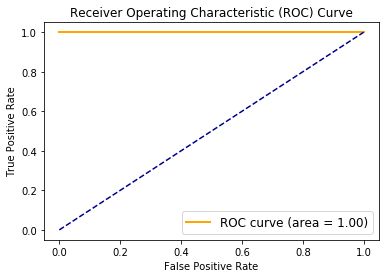

In [345]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Calculate roc auc
roc_value = roc_auc_score(y_test, y_test_pred_RDF)

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_RDF)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC value (area = %0.2f)' % roc_value, lw=2)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(fontsize=12, loc=4)
    plt.show()

plot_roc_curve(fpr, tpr)

From roc curve tell us that our model can distinguish perfectly between two classes. 

# Task 4- Evaluating final model with validation set and comparing to a baseline 

## Making Baseline with Zero Rule Algorithm 

The following baseline will be use, that take most accurent value for prediction, which will be class 0, and only predicts that value

In [399]:
# zero rule algorithm for classification
import warnings
warnings.filterwarnings('ignore')

def zero_rule_algorithm_classification(train):
    output_values = [row for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(train))]
    return predicted

#predictions
predictions = zero_rule_algorithm_classification (data.y)

cm = confusion_matrix(data.y,predictions)
    
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]

balanced_accuracy = (TP/(TP+FP)+TN/(TN+FN))/2
print ("Confusion Matrix")
print (cm)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = 2 * (precision * recall) / (precision + recall)


print ("\nclassification report:")
print ("balanced accuracy: ", balanced_accuracy)
target_names = ['class 0', 'class 1']
print (classification_report(data.y,predictions,target_names=target_names))
print ("f-score-macro:",f1_score(data.y,predictions,average="macro"))

Confusion Matrix
[[683   0]
 [117   0]]

classification report:
balanced accuracy:  nan
             precision    recall  f1-score   support

    class 0       0.85      1.00      0.92       683
    class 1       0.00      0.00      0.00       117

avg / total       0.73      0.85      0.79       800

f-score-macro: 0.4605529332434255


The baseline is only preicting one class as can only be observed from confusion matrix and classification report, the balanced accuracy therefore will be undefined. The macro f-score is very low in, the initial decision tree without tunning any parameter gave us very similar results. 

We take a macro f-score readings as the data set is imbalanced, as default avg/fscore in classificatoin report is weighted

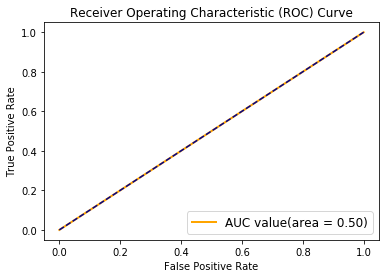

In [401]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Calculate roc auc
roc_value = roc_auc_score(data.y,predictions)

fpr, tpr, thresholds = roc_curve(data.y,predictions)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC value(area = %0.2f)' % roc_value, lw=2)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(fontsize=12, loc=4)
    plt.show()

plot_roc_curve(fpr, tpr)

Same result was obsereve on the initial run of desicion tree

### Testing tunned parameters on validation set 
Now we can train model with choosen parameters on the whole data, get unbiased accuracy of a model on untouched validation set(unseen data). 

In [354]:
# splitting data for training and testing 
x_validation = np.array(validation.drop(['y'], axis=1))
y_validation = np.array(validation.y)
x_train = np.array(data.drop(['y'], axis=1))
y_train = np.array(data.y)

#data tranformation to balance classes 
zero_class = data[data.y==0]
one_class = data[data.y==1]
    
oneclass_upsampled = resample(one_class,
                        replace=True, # sample with replacement
                        n_samples=len(zero_class), # match number in majority class
                        random_state=27)
    
upsampled = pd.concat([zero_class, oneclass_upsampled])
    
y_train = upsampled[['y']]
x_train = upsampled.loc[:, upsampled.columns != 'y']

#Standardize
sc.fit(x_train)
x_train = sc.transform(x_train)
x_validation = sc.transform (x_validation)

#params of model
rfc = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=10,
                             max_features=10,
                             max_depth=16,
                             min_samples_leaf=0.001,
                             min_samples_split=0.001
                            )

#training
rfc.fit(x_train, np.ravel(y_train))

#predicting
y_val_pred_RDF = rfc.predict(x_validation)
trian_pred_RDF = rfc.predict(x_train)

f_score_val = f1_score(y_validation, y_val_pred_RDF, average='macro')
f_score_train = f1_score(y_train, trian_pred_RDF, average='macro')

confusionMatrix = confusion_matrix(y_validation, y_val_pred_RDF)
    

In [355]:
TP = confusionMatrix[0][0]
FN = confusionMatrix[0][1]
FP = confusionMatrix[1][0]
TN = confusionMatrix[1][1]
balanced_accuracy = (TP/(TP+FP)+TN/(TN+FN))/2
print("Balanced Accuracy: ",balanced_accuracy)
print ("F-score Test: ",f_score_val.mean())
print ("F-score Train: ",f_score_train.mean())
print ("Confusion Matrix: \n",confusionMatrix)

Balanced Accuracy:  0.8177083333333333
F-score Test:  0.6336996336996337
F-score Train:  1.0
Confusion Matrix: 
 [[170   2]
 [ 22   6]]


Now it can be seen that the model was over trained in the tunning part, as on the validation set we agin see big difference in train and test, telling us that the model was tunned too fit only train data. The model needs to be retunned to to try and find better values that would give better bias variance traid off on validation set.  
From confusion matrix the model got 24 incorect predictions out of 200, the model still predicts one class better then the other, could be that even after balancing training dataset, one class still is better identified than the other. 

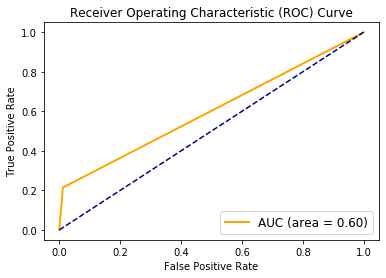

In [357]:
# Calculate roc auc
roc_value = roc_auc_score(y_validation, y_val_pred_RDF)
fpr, tpr, thresholds = roc_curve(y_validation, y_val_pred_RDF)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='AUC (area = %0.2f)' % roc_value, lw=2)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(fontsize=12, loc=4)
    plt.show()

plot_roc_curve(fpr, tpr)

Roc curve tells us how well classification model is capable of distinguishing between classes. It is an improvment from the from the baseline, however algorithm still doesnt predict well on the validation set(unseen data). 